In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data 

## TRIAL RUN

In [4]:
import yfinance as yf

start = '2010-01-01'
end = '2025-12-31'

df = yf.download('AAPL', start=start, end=end, auto_adjust=False)
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2010-01-04,6.418383,7.643214,7.660714,7.585000,7.622500,493729600
2010-01-05,6.429479,7.656429,7.699643,7.616071,7.664286,601904800
2010-01-06,6.327210,7.534643,7.686786,7.526786,7.656429,552160000
2010-01-07,6.315515,7.520714,7.571429,7.466071,7.562500,477131200
2010-01-08,6.357501,7.570714,7.571429,7.466429,7.510714,447610800


In [5]:
df.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2025-12-23,272.359985,272.359985,272.500000,269.559998,270.839996,29642000
2025-12-24,273.809998,273.809998,275.429993,272.200012,272.339996,17910600
2025-12-26,273.399994,273.399994,275.369995,272.859985,274.160004,21521800
2025-12-29,273.760010,273.760010,274.359985,272.350006,272.690002,23715200
2025-12-30,273.079987,273.079987,274.079987,272.279999,272.809998,22139600


In [6]:
df = df.reset_index() # since dates are not really useful for prediction
df.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
0,2010-01-04,6.418383,7.643214,7.660714,7.585000,7.622500,493729600
1,2010-01-05,6.429479,7.656429,7.699643,7.616071,7.664286,601904800
2,2010-01-06,6.327210,7.534643,7.686786,7.526786,7.656429,552160000
3,2010-01-07,6.315515,7.520714,7.571429,7.466071,7.562500,477131200
4,2010-01-08,6.357501,7.570714,7.571429,7.466429,7.510714,447610800


In [7]:
df = df.drop(['Date', 'Adj Close'], axis=1)
df.head()

C:\Users\Kris\AppData\Local\Temp\ipykernel_55132\4261181942.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date', 'Adj Close'], axis=1)


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,7.643214,7.660714,7.585000,7.622500,493729600
1,7.656429,7.699643,7.616071,7.664286,601904800
2,7.534643,7.686786,7.526786,7.656429,552160000
3,7.520714,7.571429,7.466071,7.562500,477131200
4,7.570714,7.571429,7.466429,7.510714,447610800


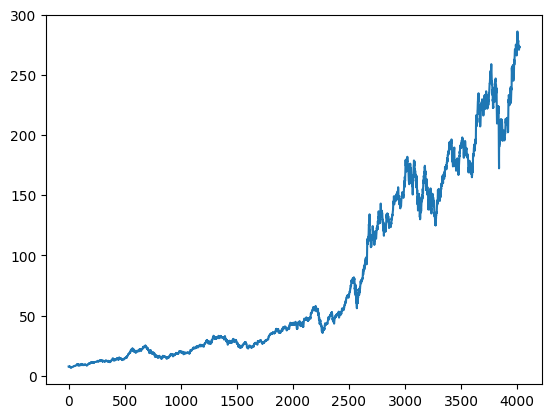

In [8]:
plt.plot(df.Close)

In [9]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
4018,254.225099
4019,254.929699
4020,255.634499
4021,256.239599


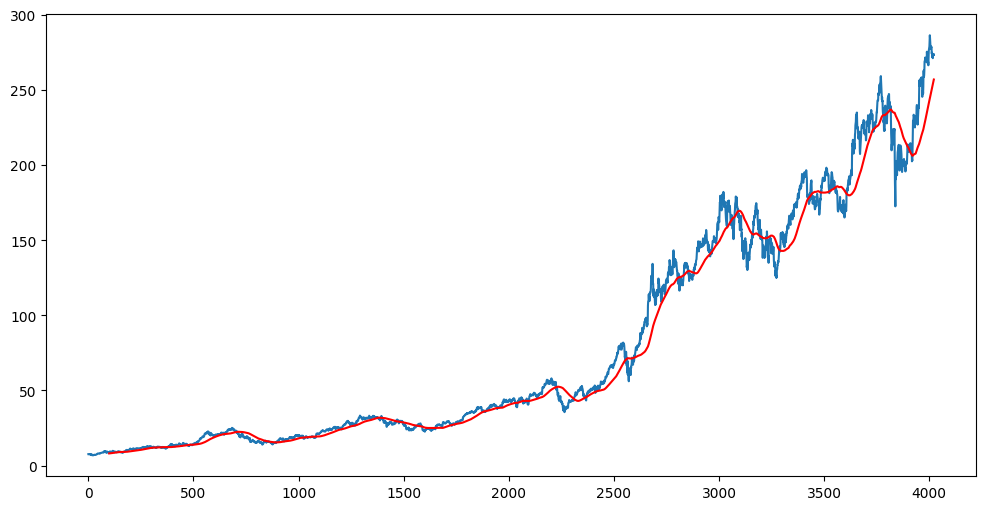

In [10]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')


In [11]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
4018,230.29570
4019,230.56055
4020,230.84265
4021,231.16305


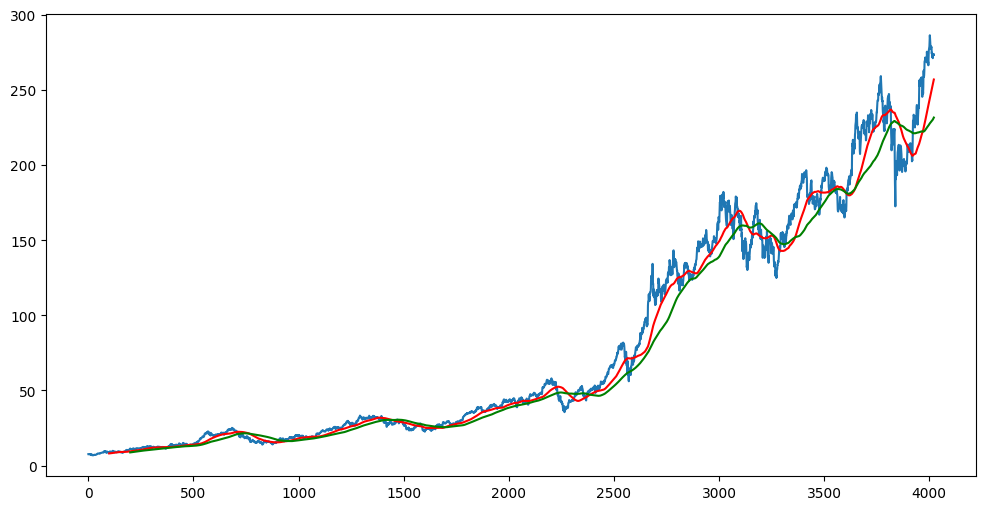

In [12]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [13]:
df.shape

(4023, 5)

In [26]:
# Returns = (Current Price - Previous Price) / Previous Price
# It shows the percentage change in price from one period to the next.
# Positive returns indicate price increases, while negative returns indicate price decreases.

In [19]:
df["return"] = df.Close.pct_change()
df.head()

Price,Close,High,Low,Open,Volume,returns,return
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,7.643214,7.660714,7.585000,7.622500,493729600,NaN,NaN
1,7.656429,7.699643,7.616071,7.664286,601904800,NaN,0.001729
2,7.534643,7.686786,7.526786,7.656429,552160000,NaN,-0.015906
3,7.520714,7.571429,7.466071,7.562500,477131200,NaN,-0.001849
4,7.570714,7.571429,7.466429,7.510714,447610800,NaN,0.006648


In [32]:
# Returns removes the price levels and focuses on relative changes, making it easier to compare performance across different stocks or time periods.
# It helps to learn momentum and reversal patterns in stock prices.

In [21]:
df.drop("returns", axis=1, inplace=True)

In [27]:
# Log Return = log(CP / PP)
# It is the natural logarithm of the ratio of the current price to the previous price.

In [24]:
df["log_returns"] = np.log(df.Close).diff()
df.head()
df.drop("log_return", axis=1, inplace=True)

In [33]:
# Log returns are time-additive, meaning the returns add over time, while prices don't, they are more symmetric for modeling percentage changes, especially for large fluctuations.

In [25]:
df.head()

Price,Close,High,Low,Open,Volume,return,log_returns
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,7.643214,7.660714,7.585000,7.622500,493729600,NaN,NaN
1,7.656429,7.699643,7.616071,7.664286,601904800,0.001729,0.001727
2,7.534643,7.686786,7.526786,7.656429,552160000,-0.015906,-0.016034
3,7.520714,7.571429,7.466071,7.562500,477131200,-0.001849,-0.001850
4,7.570714,7.571429,7.466429,7.510714,447610800,0.006648,0.006626


In [ ]:
delta = df.Close.diff() # Price change from yesterday
gain = delta.clip(lower=0).rolling(14).mean() # Avg of +ve daily changes over 14 days
loss = (-delta.clip(upper=0)).rolling(14).mean() # Avg of -ve daily changes over 14 days
rs = gain / (loss.replace(0, np.nan)) # Relative Strength = how strong the gains are compared to losses
df["RSI14"] = 100 - (100 / (1 + rs)) # Maps into a bounded scale of 0-100

In [31]:
df.head(20)

Price,Close,High,Low,Open,Volume,return,log_returns,RSI14
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,
0,7.643214,7.660714,7.585000,7.622500,493729600,NaN,NaN,NaN
1,7.656429,7.699643,7.616071,7.664286,601904800,0.001729,0.001727,NaN
2,7.534643,7.686786,7.526786,7.656429,552160000,-0.015906,-0.016034,NaN
3,7.520714,7.571429,7.466071,7.562500,477131200,-0.001849,-0.001850,NaN
4,7.570714,7.571429,7.466429,7.510714,447610800,0.006648,0.006626,NaN
5,7.503929,7.607143,7.444643,7.600000,462229600,-0.008821,-0.008861,NaN
6,7.418571,7.491786,7.372143,7.471071,594459600,-0.011375,-0.011440,NaN
7,7.523214,7.533214,7.289286,7.423929,605892000,0.014106,0.014007,NaN
8,7.479643,7.516429,7.465000,7.503929,432894000,-0.005792,-0.005808,NaN


In [35]:
# If RSI > 70: Overbought/overvalued
# < 30: Oversold, price fell too fast
# ~ 50: Neutral

# RSI helps in identifying directional momentum like are gains dominating losses?
# It can signal potential trend reversals through divergence analysis.
# It has less noise sensitivity and reduces sequence length needed

In [37]:
# MACD: Moving Average Convergence Divergence, it measures how short term momentum converges with or diverges from long term momentum.
# Convergence: short-term and long-term avg moving closer
# Divergence: avg moving apart
# MACD < 0: Bearish market
# MACD > 0: Bullish market


In [ ]:
ema12 = df.Close.ewm(span=12, adjust=False).mean() # 12-day EMA(fast moving avg)
ema26 = df.Close.ewm(span=26, adjust=False).mean() # 26-day EMA(slow moving avg)
df["MACD"] = ema12 - ema26 # MACD line
df["MACD_signal"] = df["MACD"].ewm(span=9, adjust=False).mean() # Signal Line, helps reduce noise and create crossovers.
df["MACD_hist"] = df["MACD"] - df["MACD_signal"] # Histogram, if +ve = momentum accelrating, if -ve = momentum decelerating, near zero = weak momentum
df.head(20)

Price,Close,High,Low,Open,Volume,return,log_returns,RSI14,MACD,MACD_signal,MACD_hist
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,,
0,7.643214,7.660714,7.585000,7.622500,493729600,NaN,NaN,NaN,0.000000,0.000000,0.000000
1,7.656429,7.699643,7.616071,7.664286,601904800,0.001729,0.001727,NaN,0.001054,0.000211,0.000843
2,7.534643,7.686786,7.526786,7.656429,552160000,-0.015906,-0.016034,NaN,-0.007847,-0.001401,-0.006446
3,7.520714,7.571429,7.466071,7.562500,477131200,-0.001849,-0.001850,NaN,-0.015843,-0.004289,-0.011554
4,7.570714,7.571429,7.466429,7.510714,447610800,0.006648,0.006626,NaN,-0.017938,-0.007019,-0.010919
5,7.503929,7.607143,7.444643,7.600000,462229600,-0.008821,-0.008861,NaN,-0.024703,-0.010556,-0.014147
6,7.418571,7.491786,7.372143,7.471071,594459600,-0.011375,-0.011440,NaN,-0.036530,-0.015751,-0.020780
7,7.523214,7.533214,7.289286,7.423929,605892000,0.014106,0.014007,NaN,-0.037033,-0.020007,-0.017026
8,7.479643,7.516429,7.465000,7.503929,432894000,-0.005792,-0.005808,NaN,-0.040481,-0.024102,-0.016379


In [41]:
# Bollinger Bands are used to measure market volatility and identify if stock is overbought or oversold.
# It helps LSTM models by summarizing volatility behaviour into smoother signals.
# If price near upper band the stock is overbought or if near lower band oversold.

In [ ]:
m20 = df.Close.rolling(20).mean() # Calculates mean of 20-day closing prices
s20 = df.Close.rolling(20).std() # Standard deviation of 20-day closing prices
df["BB_mids"] = m20 # Middle Band: 20-day moving average
df["BB_ups"] = m20 + 2 * s20 # Upper band: price unusually high
df["BB_lows"] = m20 - 2 * s20 # lower band: price unusually low
df.drop(["BB_mid", "BB_up", "BB_low"], axis=1, inplace=True)
df.head(30)

Price,Close,High,Low,Open,Volume,return,log_returns,RSI14,MACD,MACD_signal,MACD_hist,BB_mids,BB_ups,BB_lows
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,,,,,
0,7.643214,7.660714,7.585000,7.622500,493729600,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN
1,7.656429,7.699643,7.616071,7.664286,601904800,0.001729,0.001727,NaN,0.001054,0.000211,0.000843,NaN,NaN,NaN
2,7.534643,7.686786,7.526786,7.656429,552160000,-0.015906,-0.016034,NaN,-0.007847,-0.001401,-0.006446,NaN,NaN,NaN
3,7.520714,7.571429,7.466071,7.562500,477131200,-0.001849,-0.001850,NaN,-0.015843,-0.004289,-0.011554,NaN,NaN,NaN
4,7.570714,7.571429,7.466429,7.510714,447610800,0.006648,0.006626,NaN,-0.017938,-0.007019,-0.010919,NaN,NaN,NaN
5,7.503929,7.607143,7.444643,7.600000,462229600,-0.008821,-0.008861,NaN,-0.024703,-0.010556,-0.014147,NaN,NaN,NaN
6,7.418571,7.491786,7.372143,7.471071,594459600,-0.011375,-0.011440,NaN,-0.036530,-0.015751,-0.020780,NaN,NaN,NaN
7,7.523214,7.533214,7.289286,7.423929,605892000,0.014106,0.014007,NaN,-0.037033,-0.020007,-0.017026,NaN,NaN,NaN
8,7.479643,7.516429,7.465000,7.503929,432894000,-0.005792,-0.005808,NaN,-0.040481,-0.024102,-0.016379,NaN,NaN,NaN


In [43]:
# ATR = Average True Range, it measures how much the price moves, not the direction.
# Low ATR = quiet marker, High ATR = volatile/risky market
# Rising ATR = volatility increasing, Falling ATR = volatility decreasing
# ATR helps LSTM identify volatility regimes and adjust predictions accordingly.

In [ ]:
high = df["High"]
low = df["Low"]
prev_close = df.Close.shift(1) # Yesterday's close
tr = pd.concat(
    [(high - low).abs(), (high - prev_close).abs(), (low - prev_close).abs()],
    axis=1
).max(axis=1) # True Range, the greatest of: current high - current low, abs(current high - previous close), abs(current low - previous close)
df["ATR14"] = tr.rolling(14).mean() # Avg of last 14 True Ranges
df.head(30)

Price,Close,High,Low,Open,Volume,return,log_returns,RSI14,MACD,MACD_signal,MACD_hist,BB_mids,BB_ups,BB_lows,ATR14
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,,,,,,
0,7.643214,7.660714,7.585000,7.622500,493729600,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
1,7.656429,7.699643,7.616071,7.664286,601904800,0.001729,0.001727,NaN,0.001054,0.000211,0.000843,NaN,NaN,NaN,NaN
2,7.534643,7.686786,7.526786,7.656429,552160000,-0.015906,-0.016034,NaN,-0.007847,-0.001401,-0.006446,NaN,NaN,NaN,NaN
3,7.520714,7.571429,7.466071,7.562500,477131200,-0.001849,-0.001850,NaN,-0.015843,-0.004289,-0.011554,NaN,NaN,NaN,NaN
4,7.570714,7.571429,7.466429,7.510714,447610800,0.006648,0.006626,NaN,-0.017938,-0.007019,-0.010919,NaN,NaN,NaN,NaN
5,7.503929,7.607143,7.444643,7.600000,462229600,-0.008821,-0.008861,NaN,-0.024703,-0.010556,-0.014147,NaN,NaN,NaN,NaN
6,7.418571,7.491786,7.372143,7.471071,594459600,-0.011375,-0.011440,NaN,-0.036530,-0.015751,-0.020780,NaN,NaN,NaN,NaN
7,7.523214,7.533214,7.289286,7.423929,605892000,0.014106,0.014007,NaN,-0.037033,-0.020007,-0.017026,NaN,NaN,NaN,NaN
8,7.479643,7.516429,7.465000,7.503929,432894000,-0.005792,-0.005808,NaN,-0.040481,-0.024102,-0.016379,NaN,NaN,NaN,NaN
